In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!ls

'2009106054_Vauwez Sam El Fareez.docx'	 StudentsPerformance.csv
 pemodelan_statistika.ipynb


In [3]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Tipe Data Tiap Variabel

gender : Kategorikal
race/ethnicity : Kategorikal
parental level of education : Kategorikal

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Analisis

## Distribusi Frekuensi dan Histogram

Variabel `reading_score` dan `writing_score` dengan lebar kelas 10

In [27]:
def tabel_distribusi_frekuensi(data_terurut, lebar_kelas=10):
    nilai_terkecil = data_terurut[0]
    nilai_terbesar = data_terurut[len(data_terurut)-1]
    bins = []
    
    i = nilai_terkecil.copy() - 1
    while True:
        if i < nilai_terbesar:
            bins.append(i)
        else:
            bins.append(i)
            break
        i += 10
    
    data_bins = pd.cut(data_terurut, bins=bins)

    distribusi_frekuensi = pd.DataFrame(data_bins.value_counts().sort_index().rename("frekuensi")).reset_index()
    return distribusi_frekuensi.rename(columns={"index": "interval"})

def plot_histogram(tabel_distribusi, title):
    plt.figure(figsize=(28,9))
    ax = tabel_distribusi.plot(kind='bar', align='center', width=1.0, legend=None)
    ax.set_xticks(np.arange(len(tabel_distribusi)))
    ax.set_xticklabels(tabel_distribusi['interval'], rotation=0)
    ax.set_xlabel("Interval")
    ax.set_ylabel("Frekuensi")
    ax.set_title(title)
    plt.show()

### Variabel `reading_score`

In [4]:
data_read_scr = data.reading_score.sort_values().reset_index(drop=True)
rse_dist_table = tabel_distribusi_frekuensi(data_read_scr)

rse_dist_table

,interval,frekuensi
0,"(16, 26]",5
1,"(26, 36]",10
2,"(36, 46]",51
3,"(46, 56]",126
4,"(56, 66]",227
5,"(66, 76]",262
6,"(76, 86]",206
7,"(86, 96]",88
8,"(96, 106]",25


<Figure size 2016x648 with 0 Axes>

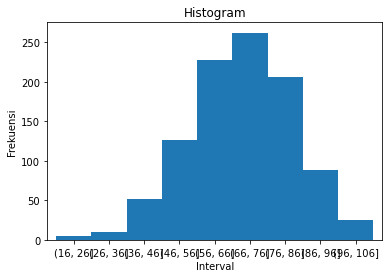

In [28]:
plot_histogram(rse_dist_table, "Histogram reading_score")

### Variabel `writing_score`

In [9]:
data_write_scr = data.writing_score.sort_values().reset_index(drop=True)
wsr_dist_table = tabel_distribusi_frekuensi(data_write_scr)

wsr_dist_table

,interval,frekuensi
0,"(9, 19]",3
1,"(19, 29]",6
2,"(29, 39]",23
3,"(39, 49]",82
4,"(49, 59]",167
5,"(59, 69]",230
6,"(69, 79]",254
7,"(79, 89]",157
8,"(89, 99]",64
9,"(99, 109]",14


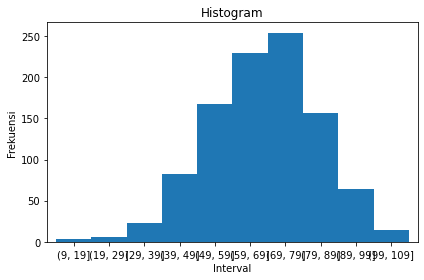

In [10]:
plot_histogram(wsr_dist_table, "Histogram writing_score")

## Tendensi Central

Rata-rata, median, modus, min, dan max

In [11]:
def tendensi_central(data_terurut):
    mode = data_terurut.mode().rename({0: 'modus'})
    the_rest = data_terurut.describe().loc[['mean', '50%', 'min', 'max']].rename({'50%': 'median'})

    return the_rest.append(mode)

In [12]:
tendensi_central(data_read_scr).rename('reading_score')

mean       69.169
median     70.000
min        17.000
max       100.000
modus      72.000
Name: reading_score, dtype: float64

In [13]:
tendensi_central(data_write_scr).rename('writing_score')

mean       68.054
median     69.000
min        10.000
max       100.000
modus      74.000
Name: writing_score, dtype: float64

## Nilai Variasi

Range, interquartile range, varians, standar deviasi

In [13]:
def nilai_variasi(data_terurut):
    jangkauan = data_terurut[data_terurut.index[-1]] - data_terurut[0]
    iqr = data_terurut.quantile(0.75) - data_terurut.quantile(0.25)
    varians = data_terurut.var()
    std = data_terurut.std()

    return pd.Series([jangkauan, iqr, varians, std],
                     index=["jangkauan", "kisaran_interquartil", "variansi", "standar_deviasi"])

In [15]:
nilai_variasi(data_read_scr).rename("reading_score")

jangkauan                83.000000
kisaran_interquartil     20.000000
variansi                213.165605
standar_deviasi          14.600192
Name: reading_score, dtype: float64

In [17]:
nilai_variasi(data_write_scr).rename("writing_score")

jangkauan                90.000000
kisaran_interquartil     21.250000
variansi                230.907992
standar_deviasi          15.195657
Name: writing_score, dtype: float64

## Grafik Data

Histogram, box plot, dan tentukan nilai skewness dan kurtosis.

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='writing_score', ylabel='Count'>

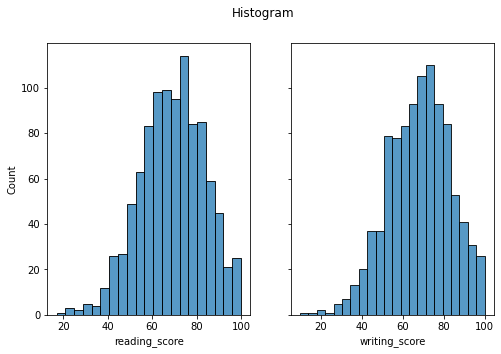

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(8,5))
fig.suptitle("Histogram")

sns.histplot(data_read_scr, ax=ax1)
sns.histplot(data_write_scr, ax=ax2)

Text(0.5, 0, 'score')

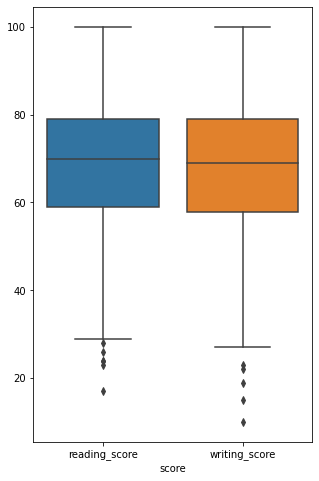

In [54]:
plt.figure(figsize=(5,8))
ax = sns.boxplot(data=[data_read_scr, data_write_scr])
ax.set_xticklabels(["reading_score", "writing_score"])
ax.set_xlabel("score")
ax.set_title("Boxplot")

In [58]:
print("skewness")
print("reading_score:", data_read_scr.skew())
print("writing_score:", data_write_scr.skew())

skewness
reading_score: -0.2591045181092306
writing_score: -0.28944397150761897


In [59]:
print("kurtosis")
print("reading_score:", data_read_scr.kurt())
print("writing_score:", data_write_scr.kurt())

kurtosis
reading_score: -0.0682654585647704
writing_score: -0.03336461500693488


## Scatter Plot

<AxesSubplot:xlabel='reading_score', ylabel='writing_score'>

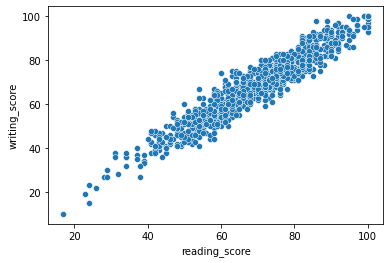

In [7]:
sns.scatterplot(x=data.reading_score, y=data.writing_score)